In [1]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data2007 = pd.read_csv('2007.txt',';',na_values='?')
data2007.count()

Day                      525600
Month                    525600
Minute                   525600
Global_active_power      521669
Global_reactive_power    521669
Voltage                  521669
Global_intensity         521669
Sub_metering_1           521669
Sub_metering_2           521669
Sub_metering_3           521669
dtype: int64

In [25]:
useful = data2007.dropna()
n = useful.count()[0]
n_hour = 1
prec = 60*n_hour
A = np.empty([n-prec,prec])
for i in xrange(0,prec):
    A[:,i] = useful[i:n-prec+i].Sub_metering_1.values
b = useful[prec:n].Sub_metering_1.values
sol2,err2,rank2,singualr2 = np.linalg.lstsq(A,b)
pred2 = np.dot(A,sol2)

In [30]:
#training-error
err2

array([ 3139400.67885284])

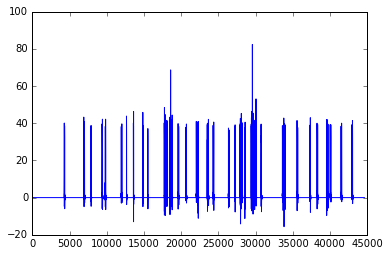

In [29]:
#prediction for the first 31 days
plt.plot(pred2[0:60*24*31])

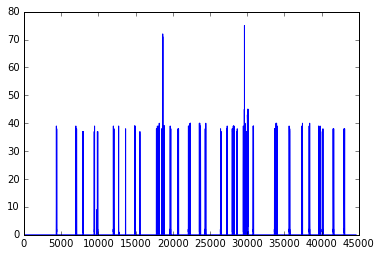

In [31]:
#true value
plt.plot(useful[0:60*24*31].Sub_metering_1.values)